# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu. It is updated weekly and I last downloaded the dataset on 8/7/2020.  



## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis and Visualizations 
    IV. Data Modeling
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78753?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78741?</a></li>
><li><a href="#q4"> 4. How are violent crimes, in particular murder and rape, distributed?</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is update weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I originally attempted importing the data into this notebook using Sodapy's Socrata API method but found it cumbersome. Mainly, it didn't want to work with importing the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# Importing libraries and configurations
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Loading the data
df = pd.read_csv(r'C:\Users\Robert\Downloads\crime_reports.csv')

# Examining the dataframe
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.duplicated().sum())
print('----------------------------------')
display(df.isnull().sum())

Incident Number     Highest Offense Description  Highest Offense Code  \
0      20183000009              DATING DISTURBANCE                  2400   
1      20141381413              FAMILY DISTURBANCE                  3400   
2      20081002040  CRASH/FAIL STOP AND RENDER AID                  3604   
3      20161971680                             DWI                  2100   
4      20135029070                PROTECTIVE ORDER                  3829   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  10/27/2018 12:03:00 AM    10/27/2018            3.0   
1               N  05/18/2014 07:09:00 PM    05/18/2014         1909.0   
2               N  04/09/2008 07:04:00 PM    04/09/2008         1904.0   
3               N  07/15/2016 10:15:00 PM    07/15/2016         2215.0   
4               N  06/28/2013 12:15:00 PM    06/28/2013         1215.0   

         Report Date Time Report Date  Report Time  \
0  10/27/2018 12:28:00 AM  10/27/2018         28.0   
1  05/18/2014 07:09:00 PM  05/18/2014       1909.0   
2  04/09/2008 09:08:00 PM  04/09/2008       2108.0   
3  07/16/2016 12:22:00 AM  07/16/2016         22.0   
4  06/28/2013 12:15:00 PM  06/28/2013       1215.0   

                  Location Type                  Address  Zip Code  \
0         PARKING LOTS / GARAGE       2201 MONTOPLOIS DR       NaN   
1              RESIDENCE / HOME  12836 BUENOS ARIES PKWY       NaN   
2  STREETS / HWY / ROAD / ALLEY  2500 BLOCK OF GUADALUPE       NaN   
3  STREETS / HWY / ROAD / ALLEY      6000 BLK OF BOLM RD       NaN   
4              RESIDENCE / HOME        COHISE COUNTY  AZ       NaN   

   Council District APD Sector APD District  PRA  Census Tract  \
0               NaN        NaN          NaN  NaN           NaN   
1               NaN        NaN          NaN  NaN           NaN   
2               NaN        NaN          NaN  NaN           NaN   
3               NaN        NaN          NaN  NaN           NaN   
4               NaN        NaN          NaN  NaN           NaN   

  Clearance Status Clearance Date UCR Category Category Description  \
0                N     10/31/2018          NaN                  NaN   
1                N     05/26/2014          NaN                  NaN   
2                N     12/16/2008          NaN                  NaN   
3                C     01/03/2018          NaN                  NaN   
4                N     06/28/2013          NaN                  NaN   

   X-coordinate  Y-coordinate  Latitude  Longitude Location  
0           NaN           NaN       NaN        NaN      NaN  
1           NaN           NaN       NaN        NaN      NaN  
2           NaN           NaN       NaN        NaN      NaN  
3           NaN           NaN       NaN        NaN      NaN  
4           NaN           NaN       NaN        NaN      NaN

----------------------------------


Incident Number  Highest Offense Description  Highest Offense Code  \
2255900      20175007735                   HARASSMENT                  2703   
2255901      20108800371  CRIMINAL TRESPASS/TRANSIENT                  2721   
2255902    2003924076801        BURGLARY OF RESIDENCE                   500   
2255903       2006902409       BURGLARY NON RESIDENCE                   502   
2255904       2010232299           FAMILY DISTURBANCE                  3400   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2255900               N  01/31/2017 10:31:00 AM    01/31/2017         1031.0   
2255901               N  03/29/2010 07:17:00 AM    03/29/2010          717.0   
2255902               N  01/04/2003 06:30:00 PM    01/04/2003         1830.0   
2255903               N  03/31/2006 10:46:00 PM    03/31/2006         2246.0   
2255904               N  01/23/2010 10:44:00 PM    01/23/2010         2244.0   

               Report Date Time Report Date  Report Time  \
2255900  02/23/2017 10:31:00 AM  02/23/2017       1031.0   
2255901  03/29/2010 07:17:00 AM  03/29/2010        717.0   
2255902  01/05/2003 10:31:00 AM  01/05/2003       1031.0   
2255903  03/31/2006 10:46:00 PM  03/31/2006       2246.0   
2255904  01/24/2010 12:14:00 AM  01/24/2010         14.0   

                                Location Type                     Address  \
2255900                      RESIDENCE / HOME             9802 ROXANNA DR   
2255901  CHURCH / SYNAGOGUE / TEMPLE / MOSQUE               203 E 10TH ST   
2255902                      RESIDENCE / HOME             1809 SANCHEZ ST   
2255903          COMMERCIAL / OFFICE BUILDING  6016 OLD FREDERICKSBURG RD   
2255904                      RESIDENCE / HOME            9307 GEORGIAN DR   

         Zip Code  Council District APD Sector APD District  PRA  \
2255900   78748.0               5.0         FR            1  535   
2255901   78701.0               9.0         GE            1  379   
2255902   78702.0               1.0         CH            3  394   
2255903   78749.0               8.0         DA            6   78   
2255904   78753.0               4.0         ED            1  250   

         Census Tract Clearance Status Clearance Date UCR Category  \
2255900         17.47                N     03/16/2017          NaN   
2255901         11.00                N     03/30/2010          NaN   
2255902          8.00                N            NaN          220   
2255903           NaN              NaN     05/10/2006          220   
2255904         18.00                N     02/06/2010          NaN   

        Category Description  X-coordinate  Y-coordinate   Latitude  \
2255900                  NaN     3088221.0     3088221.0  30.176236   
2255901                  NaN     3115283.0     3115283.0  30.271040   
2255902             Burglary     3125587.0     3125587.0  30.281489   
2255903             Burglary     3081299.0     3081299.0  30.234197   
2255904                  NaN     3129098.0     3129098.0  30.360317   

         Longitude                     Location  
2255900 -97.827862  (30.17623555, -97.82786218)  
2255901 -97.739653  (30.27103998, -97.73965326)  
2255902 -97.706719  (30.28148881, -97.70671938)  
2255903 -97.848283    (30.2341966, -97.8482829)  
2255904 -97.693437  (30.36031662, -97.69343723)

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255905 entries, 0 to 2255904
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate 

None

----------------------------------


0

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20857
Address                             12
Zip Code                         13705
Council District                 46742
APD Sector                        8696
APD District                      9164
PRA                              10384
Census Tract                   1316664
Clearance Status                601963
Clearance Date                  332750
UCR Category                   1490159
Category Description           1490159
X-coordinate                      9798
Y-coordinate                      9798
Latitude                         37995
Longitude                

## II. Data Scrubbing

There are several columns of data we won't be using in the analysis, mainly other date and geodata columns. So we'll drop those and also scrub some others. Mainly, we want the zip code and address columns to be free of nulls and duplicates. 

In [2]:
# Setting 'Report Date Time' as the index after converting it to datetime64 format
df.dropna(subset=['Report Date Time'], inplace=True) 
df.rename(columns = {'Report Date Time':'report_date_time'}, inplace=True)
df.report_date_time = df.report_date_time.astype('datetime64')
df.set_index(['report_date_time'], inplace=True)
df.sort_index(inplace=True)

# Cleaning essential columns and converting them to the appropriate data type
df.dropna(subset=['Address'], inplace=True)
df.dropna(subset=['Zip Code'], inplace=True)
df['Occurred Date'] = df['Occurred Date'].astype('datetime64')
df['Clearance Date'] = df['Clearance Date'].astype('datetime64')

# Dropping unnecessary columns 
df.drop(['Incident Number', 'Occurred Date Time', 'Occurred Time', 'Report Date', 'Report Time', 'Census Tract', 
         'UCR Category', 'X-coordinate', 'Category Description', 'Y-coordinate', 'Location'], axis=1, inplace=True)

#changing column names
df.rename(columns = {'Highest Offense Description': 'highest_offense_description', 'Highest Offense Code':
                     'highest_offense_code', 'Family Violence':'family_violence', 'Occurred Date':'occurred_date', 
                     'Location Type':'location_type', 'Address':'address', 'Zip Code':'zip_code', 'Council District':
                     'council_district', 'APD Sector':'apd_sector', 'APD District':'apd_district', 'PRA':'pra', 
                     'Clearance Status':'clearance_status', 'Clearance Date':'clearance_date', 'Latitude':'latitude', 
                     'Longitude':'longitude'}, inplace=True)

# Sorting and showing the index 
display(df.index)

# Rechecking null values
print('----------------------------------')
display(df.isnull().sum())

DatetimeIndex(['2002-11-29 05:30:00', '2003-01-01 00:01:00',
               '2003-01-01 00:02:00', '2003-01-01 00:03:00',
               '2003-01-01 00:06:00', '2003-01-01 00:08:00',
               '2003-01-01 00:10:00', '2003-01-01 00:11:00',
               '2003-01-01 00:11:00', '2003-01-01 00:12:00',
               ...
               '2020-08-01 19:51:00', '2020-08-01 20:08:00',
               '2020-08-01 20:24:00', '2020-08-01 20:41:00',
               '2020-08-01 20:54:00', '2020-08-01 21:04:00',
               '2020-08-01 22:27:00', '2020-08-01 22:57:00',
               '2020-08-01 23:25:00', '2020-08-01 23:27:00'],
              dtype='datetime64[ns]', name='report_date_time', length=2242199, freq=None)

----------------------------------


highest_offense_description         0
highest_offense_code                0
family_violence                     0
occurred_date                       0
location_type                   20462
address                             0
zip_code                            0
council_district                33037
apd_sector                          8
apd_district                       11
pra                                11
clearance_status               597547
clearance_date                 329606
latitude                        27453
longitude                       27453
dtype: int64

In [3]:
# rechecking/removing duplicates
display(df.duplicated().sum())

17714

In [4]:
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

0

## III. Exploratory Analysis

***Note: I am only including zipcodes and crimes, for questions 1 - 3, that equal or are greater than 1%. Any areas or crime percentages, below 1%, will be discluded to simplify analysis and visualizations.***


<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest rate of crime? 

In [5]:
# Reexamining the dataframe 
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.shape)

highest_offense_description  highest_offense_code  \
report_date_time                                                        
2002-11-29 05:30:00          FAMILY DISTURBANCE                  3400   
2003-01-01 00:01:00              DEADLY CONDUCT                   408   
2003-01-01 00:02:00      BURGLARY NON RESIDENCE                   502   
2003-01-01 00:03:00              DEADLY CONDUCT                   408   
2003-01-01 00:06:00  RESISTING ARREST OR SEARCH                   905   

                    family_violence occurred_date  \
report_date_time                                    
2002-11-29 05:30:00               N    2003-01-29   
2003-01-01 00:01:00               N    2003-01-01   
2003-01-01 00:02:00               N    2003-01-01   
2003-01-01 00:03:00               N    2003-01-01   
2003-01-01 00:06:00               N    2003-01-01   

                                    location_type                 address  \
report_date_time                                                            
2002-11-29 05:30:00              RESIDENCE / HOME         6263 MC NEIL DR   
2003-01-01 00:01:00              RESIDENCE / HOME  6400 CHIMNEY CREEK CIR   
2003-01-01 00:02:00  COMMERCIAL / OFFICE BUILDING       730 W STASSNEY LN   
2003-01-01 00:03:00              RESIDENCE / HOME     1521 REAGAN HILL DR   
2003-01-01 00:06:00              RESIDENCE / HOME        2407 CORONADO ST   

                     zip_code  council_district apd_sector apd_district  pra  \
report_date_time                                                               
2002-11-29 05:30:00   78727.0               6.0         AD            3  183   
2003-01-01 00:01:00   78723.0               1.0         ID            4  297   
2003-01-01 00:02:00   78745.0               2.0         DA            3  511   
2003-01-01 00:03:00   78752.0               4.0         ID            2  266   
2003-01-01 00:06:00   78702.0               3.0         CH            2  422   

                    clearance_status clearance_date   latitude  longitude  
report_date_time                                                           
2002-11-29 05:30:00                N            NaT  30.441398 -97.747483  
2003-01-01 00:01:00                N            NaT  30.312100 -97.678260  
2003-01-01 00:02:00              NaN     2003-10-18  30.209853 -97.782088  
2003-01-01 00:03:00                C     2003-01-02  30.325735 -97.689095  
2003-01-01 00:06:00                C     2003-01-01  30.261713 -97.713550

----------------------------------


highest_offense_description  highest_offense_code  \
report_date_time                                                        
2020-08-01 21:04:00                       THEFT                   600   
2020-08-01 22:27:00  INTERFERENCE PUBLIC DUTIES                  3397   
2020-08-01 22:57:00         DISTURBANCE - OTHER                  3401   
2020-08-01 23:25:00           THEFT FROM PERSON                   610   
2020-08-01 23:27:00   ASSAULT ON PUBLIC SERVANT                   903   

                    family_violence occurred_date  \
report_date_time                                    
2020-08-01 21:04:00               N    2020-08-01   
2020-08-01 22:27:00               N    2020-08-01   
2020-08-01 22:57:00               N    2020-08-01   
2020-08-01 23:25:00               N    2020-08-01   
2020-08-01 23:27:00               N    2020-08-01   

                                    location_type                   address  \
report_date_time                                                              
2020-08-01 21:04:00         PARKING LOTS / GARAGE     2610 LAKE AUSTIN BLVD   
2020-08-01 22:27:00  STREETS / HWY / ROAD / ALLEY          300 CONGRESS AVE   
2020-08-01 22:57:00  STREETS / HWY / ROAD / ALLEY  8200 E BEN WHITE BLVD EB   
2020-08-01 23:25:00  STREETS / HWY / ROAD / ALLEY          400 CONGRESS AVE   
2020-08-01 23:27:00  STREETS / HWY / ROAD / ALLEY   E 4TH ST / CONGRESS AVE   

                     zip_code  council_district apd_sector apd_district  pra  \
report_date_time                                                               
2020-08-01 21:04:00   78703.0              10.0         BA            7  370   
2020-08-01 22:27:00   78701.0               9.0         GE            4  405   
2020-08-01 22:57:00   78741.0               3.0         HE            5  444   
2020-08-01 23:25:00   78701.0               9.0         GE            1  380   
2020-08-01 23:27:00   78701.0               9.0         GE            3  406   

                    clearance_status clearance_date   latitude  longitude  
report_date_time                                                           
2020-08-01 21:04:00              NaN            NaT  30.281562 -97.775059  
2020-08-01 22:27:00              NaN            NaT  30.265743 -97.743762  
2020-08-01 22:57:00              NaN            NaT  30.221106 -97.685299  
2020-08-01 23:25:00              NaN            NaT  30.266500 -97.743894  
2020-08-01 23:27:00              NaN            NaT  30.266208 -97.743503

----------------------------------


(2224485, 15)

78741.0    202055
78753.0    173047
78701.0    164277
78758.0    154733
78704.0    150022
78745.0    147337
78702.0    134186
78744.0    123278
78723.0    115601
78752.0     82421
78748.0     66179
78759.0     64303
78751.0     60049
78757.0     56310
78705.0     55631
78721.0     46751
78749.0     39473
78724.0     36828
78727.0     34909
78703.0     34366
78731.0     27739
78746.0     27047
78729.0     24862
78750.0     22957
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.090832
78753.0    0.077792
78701.0    0.073849
78758.0    0.069559
78704.0    0.067441
78745.0    0.066234
78702.0    0.060322
78744.0    0.055419
78723.0    0.051968
78752.0    0.037052
78748.0    0.029750
78759.0    0.028907
78751.0    0.026995
78757.0    0.025314
78705.0    0.025008
78721.0    0.021017
78749.0    0.017745
78724.0    0.016556
78727.0    0.015693
78703.0    0.015449
78731.0    0.012470
78746.0    0.012159
78729.0    0.011177
78750.0    0.010320
Name: zip_code, dtype: float64

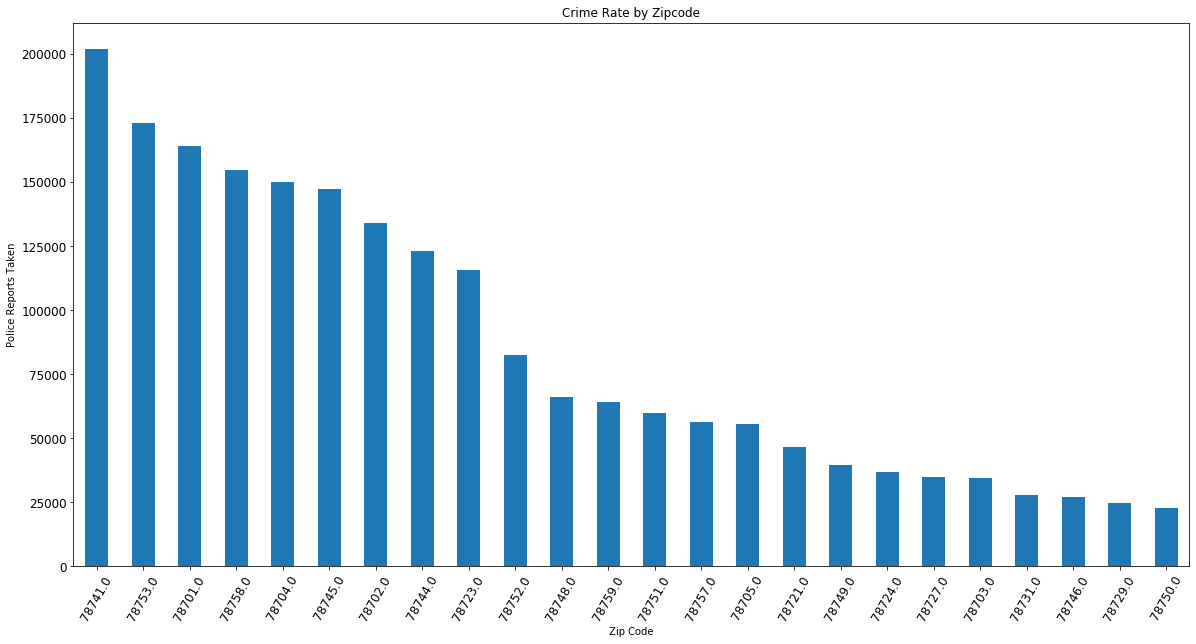

In [6]:
# Create and show dataframe for crime rates by zipcode
zip_codes = df.zip_code.value_counts().head(24)
display(zip_codes)

# Showing the dataframe as percentages
print('----------------------------------')
display(df.zip_code.value_counts(normalize=True).head(24))

zip_codes.plot.bar(figsize=(20,10), fontsize=12, rot=60)

plt.xlabel('Zip Code')
plt.ylabel('Police Reports Taken')
plt.title('Crime Rate by Zipcode')
plt.savefig('crime_rates.png')

Out of all the areas in Austin, 78741 has the highest percentage of overall crime at 9.08%. This is a significant 1.3 percentage points higher than the number 2 area 78753 which hosts 7.78% of overall crime.

#### Taking a closer look at particular areas... 

Because 78753 is my resident zipcode, I chose to examine it first. 

Next, I'll examine 78741. 

<a id='q2'></a>
### B. Question 2. How is crime distributed in 78753? 

THEFT                             16692
BURGLARY OF VEHICLE               15323
FAMILY DISTURBANCE                14185
CRIMINAL MISCHIEF                  9156
THEFT BY SHOPLIFTING               7176
ASSAULT W/INJURY-FAM/DATE VIOL     6993
BURGLARY OF RESIDENCE              5943
DWI                                4826
DISTURBANCE - OTHER                4651
CUSTODY ARREST TRAFFIC WARR        4306
HARASSMENT                         4129
AUTO THEFT                         4021
POSS OF DRUG PARAPHERNALIA         3698
PUBLIC INTOXICATION                3336
ASSAULT WITH INJURY                3210
CRIMINAL TRESPASS                  3071
RUNAWAY CHILD                      2874
POSS CONTROLLED SUB/NARCOTIC       2803
WARRANT ARREST NON TRAFFIC         2777
POSSESSION OF MARIJUANA            2672
BURGLARY NON RESIDENCE             2410
VIOL CITY ORDINANCE - OTHER        1830
Name: highest_offense_description, dtype: int64

----------------------------------


THEFT                             0.096459
BURGLARY OF VEHICLE               0.088548
FAMILY DISTURBANCE                0.081972
CRIMINAL MISCHIEF                 0.052910
THEFT BY SHOPLIFTING              0.041469
ASSAULT W/INJURY-FAM/DATE VIOL    0.040411
BURGLARY OF RESIDENCE             0.034343
DWI                               0.027888
DISTURBANCE - OTHER               0.026877
CUSTODY ARREST TRAFFIC WARR       0.024883
HARASSMENT                        0.023861
AUTO THEFT                        0.023236
POSS OF DRUG PARAPHERNALIA        0.021370
PUBLIC INTOXICATION               0.019278
ASSAULT WITH INJURY               0.018550
CRIMINAL TRESPASS                 0.017747
RUNAWAY CHILD                     0.016608
POSS CONTROLLED SUB/NARCOTIC      0.016198
WARRANT ARREST NON TRAFFIC        0.016048
POSSESSION OF MARIJUANA           0.015441
BURGLARY NON RESIDENCE            0.013927
VIOL CITY ORDINANCE - OTHER       0.010575
Name: highest_offense_description, dtype: float64

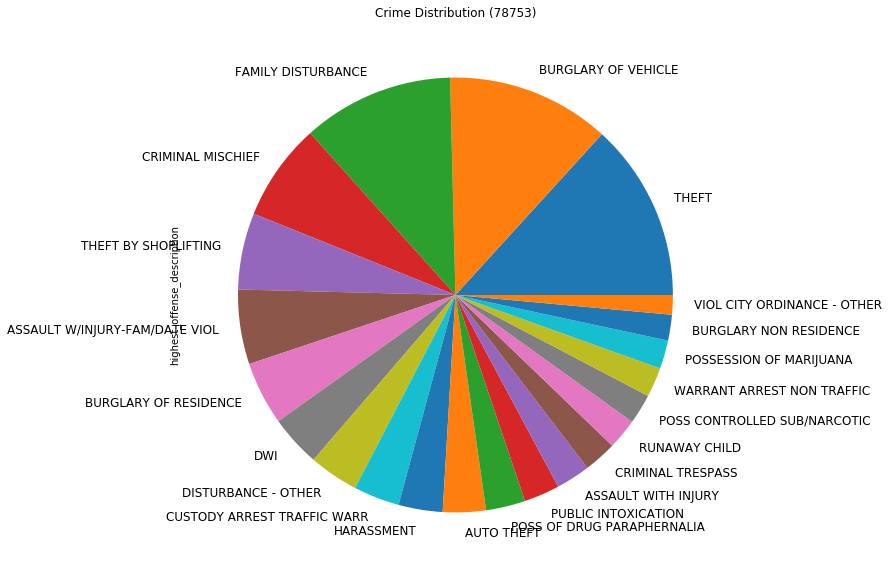

In [7]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages 
display(df_53_off)
print('----------------------------------')
display(df_53.highest_offense_description.value_counts(normalize=True).head(22))

df_53_off.plot.pie(figsize=(10,10), fontsize=12, rot=60)
plt.title('Crime Distribution (78753)')
plt.savefig('crime_distribution_78753.png')

<a id='q3'></a>
### C. Question 3. How is crime distributed in 78741? 

FAMILY DISTURBANCE                19814
BURGLARY OF VEHICLE               19172
THEFT                             15271
CRIMINAL MISCHIEF                 10808
ASSAULT W/INJURY-FAM/DATE VIOL     9503
BURGLARY OF RESIDENCE              8711
PUBLIC INTOXICATION                6346
CUSTODY ARREST TRAFFIC WARR        5992
DWI                                5593
HARASSMENT                         5394
DISTURBANCE - OTHER                5070
ASSAULT WITH INJURY                4452
AUTO THEFT                         4449
POSS CONTROLLED SUB/NARCOTIC       3795
CRIMINAL TRESPASS                  3787
POSSESSION OF MARIJUANA            3775
POSS OF DRUG PARAPHERNALIA         3508
WARRANT ARREST NON TRAFFIC         3444
THEFT BY SHOPLIFTING               3375
RUNAWAY CHILD                      2755
VIOL CITY ORDINANCE - OTHER        2145
Name: highest_offense_description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.098062
BURGLARY OF VEHICLE               0.094885
THEFT                             0.075578
CRIMINAL MISCHIEF                 0.053490
ASSAULT W/INJURY-FAM/DATE VIOL    0.047032
BURGLARY OF RESIDENCE             0.043112
PUBLIC INTOXICATION               0.031407
CUSTODY ARREST TRAFFIC WARR       0.029655
DWI                               0.027681
HARASSMENT                        0.026696
DISTURBANCE - OTHER               0.025092
ASSAULT WITH INJURY               0.022034
AUTO THEFT                        0.022019
POSS CONTROLLED SUB/NARCOTIC      0.018782
CRIMINAL TRESPASS                 0.018742
POSSESSION OF MARIJUANA           0.018683
POSS OF DRUG PARAPHERNALIA        0.017362
WARRANT ARREST NON TRAFFIC        0.017045
THEFT BY SHOPLIFTING              0.016703
RUNAWAY CHILD                     0.013635
VIOL CITY ORDINANCE - OTHER       0.010616
Name: highest_offense_description, dtype: float64

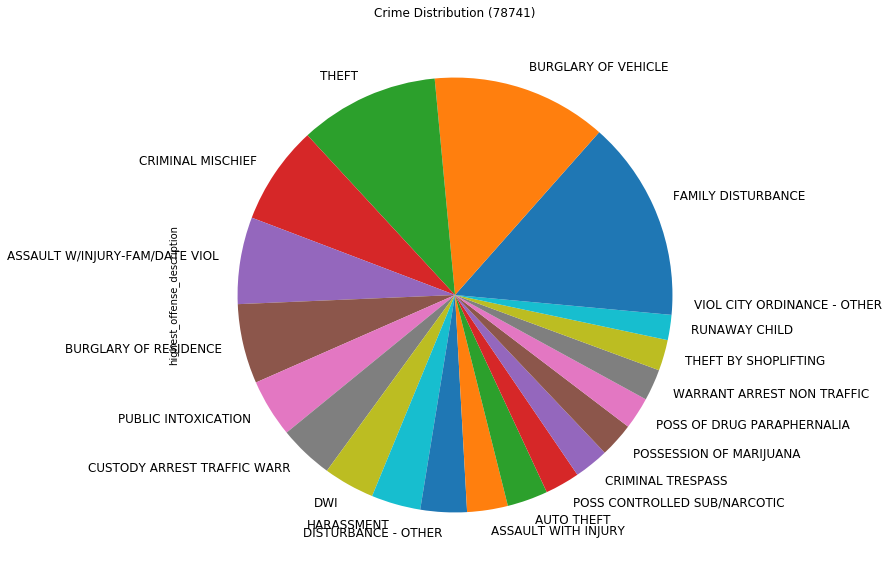

In [8]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# Display the different crime values & then as percentages 
display(df_41_off)
print('----------------------------------')
display(df_41.highest_offense_description.value_counts(normalize=True).head(21))

df_41_off.plot.pie(figsize=(10,10), fontsize=12)
plt.title('Crime Distribution (78741)')
plt.savefig('crime_distribution_78741.png')

<a id='q4'></a>
### D. Question 4. How are violent crimes, in particular murder and rape, distributed? 

***Note: Rape distribution will include only areas in which rape >= 1%.***

----------------------------------
Murder
----------------------------------


78741.0    42
78753.0    40
78758.0    36
78723.0    33
78744.0    27
78702.0    24
78752.0    21
78745.0    20
78701.0    16
78704.0    16
78721.0    13
78724.0    12
78749.0    10
78751.0     8
78757.0     6
78759.0     6
78617.0     6
78705.0     6
78754.0     5
78727.0     5
78731.0     4
78748.0     4
78747.0     4
78750.0     4
78735.0     3
78742.0     2
78746.0     2
78660.0     2
78729.0     2
78756.0     2
78728.0     1
78653.0     1
78613.0     1
78717.0     1
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.109091
78753.0    0.103896
78758.0    0.093506
78723.0    0.085714
78744.0    0.070130
78702.0    0.062338
78752.0    0.054545
78745.0    0.051948
78701.0    0.041558
78704.0    0.041558
78721.0    0.033766
78724.0    0.031169
78749.0    0.025974
78751.0    0.020779
78757.0    0.015584
78759.0    0.015584
78617.0    0.015584
78705.0    0.015584
78754.0    0.012987
78727.0    0.012987
78731.0    0.010390
78748.0    0.010390
78747.0    0.010390
78750.0    0.010390
78735.0    0.007792
78742.0    0.005195
78746.0    0.005195
78660.0    0.005195
78729.0    0.005195
78756.0    0.005195
78728.0    0.002597
78653.0    0.002597
78613.0    0.002597
78717.0    0.002597
Name: zip_code, dtype: float64

----------------------------------
Capital Murder
----------------------------------


78723.0    11
78753.0    11
78758.0     8
78741.0     7
78745.0     6
78752.0     6
78744.0     4
78748.0     3
78721.0     3
78702.0     3
78704.0     2
78757.0     2
78705.0     2
78727.0     2
78724.0     2
78722.0     1
78703.0     1
78759.0     1
78749.0     1
78731.0     1
78701.0     1
78754.0     1
Name: zip_code, dtype: int64

----------------------------------


78723.0    0.139241
78753.0    0.139241
78758.0    0.101266
78741.0    0.088608
78745.0    0.075949
78752.0    0.075949
78744.0    0.050633
78748.0    0.037975
78721.0    0.037975
78702.0    0.037975
78704.0    0.025316
78757.0    0.025316
78705.0    0.025316
78727.0    0.025316
78724.0    0.025316
78722.0    0.012658
78703.0    0.012658
78759.0    0.012658
78749.0    0.012658
78731.0    0.012658
78701.0    0.012658
78754.0    0.012658
Name: zip_code, dtype: float64

----------------------------------
Rape
----------------------------------


78741.0    497
78753.0    356
78701.0    352
78758.0    310
78745.0    273
78704.0    240
78705.0    205
78744.0    203
78723.0    196
78702.0    181
78752.0    140
78748.0    112
78751.0    110
78759.0    103
78757.0     81
78721.0     73
78724.0     64
78729.0     55
78749.0     53
78731.0     52
78754.0     47
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.120866
78753.0    0.086576
78701.0    0.085603
78758.0    0.075389
78745.0    0.066391
78704.0    0.058366
78705.0    0.049854
78744.0    0.049368
78723.0    0.047665
78702.0    0.044018
78752.0    0.034047
78748.0    0.027237
78751.0    0.026751
78759.0    0.025049
78757.0    0.019698
78721.0    0.017753
78724.0    0.015564
78729.0    0.013375
78749.0    0.012889
78731.0    0.012646
78754.0    0.011430
Name: zip_code, dtype: float64

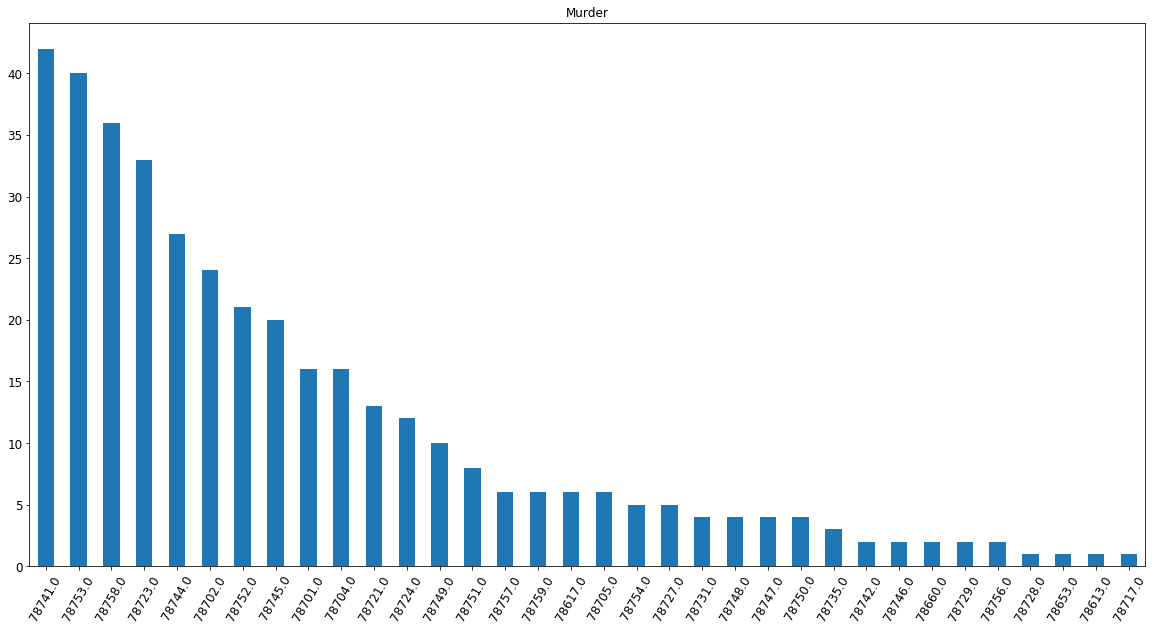

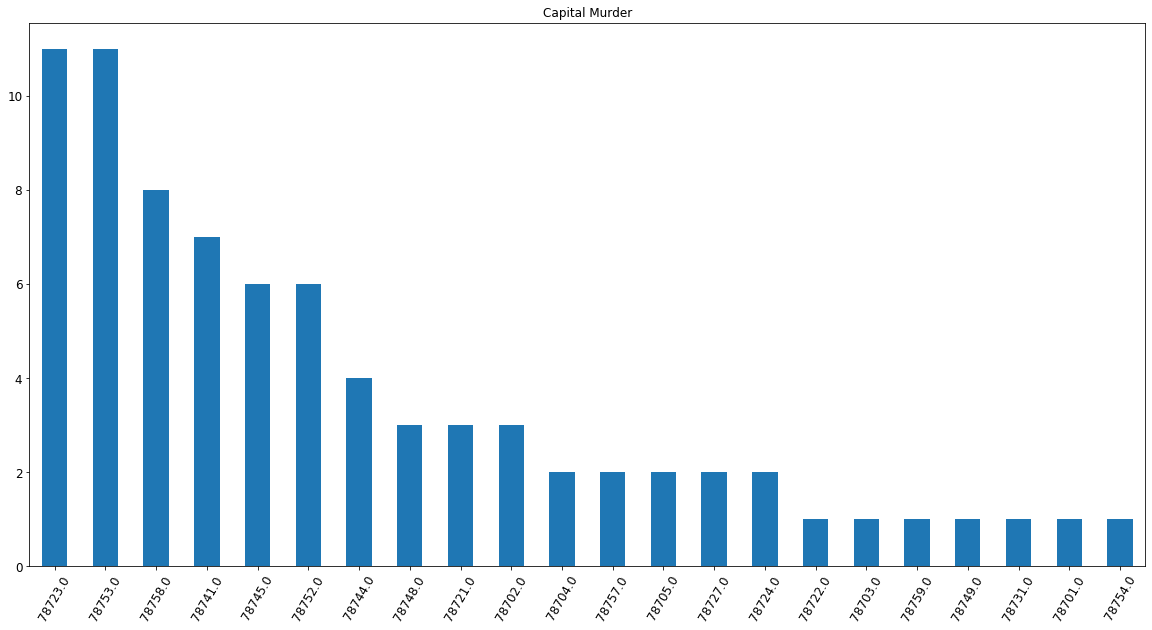

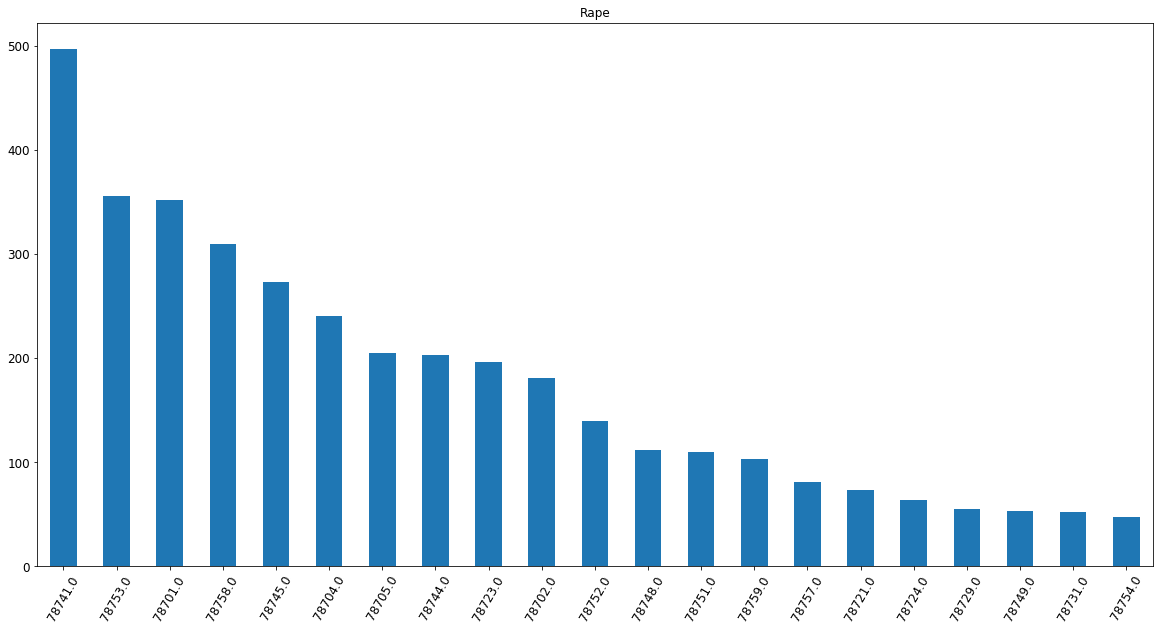

------------------------------------------------------------------------------------------
Plotting Murder and Capital Murder in Seaborn Jointplots using Latitude and Longitude Data
------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

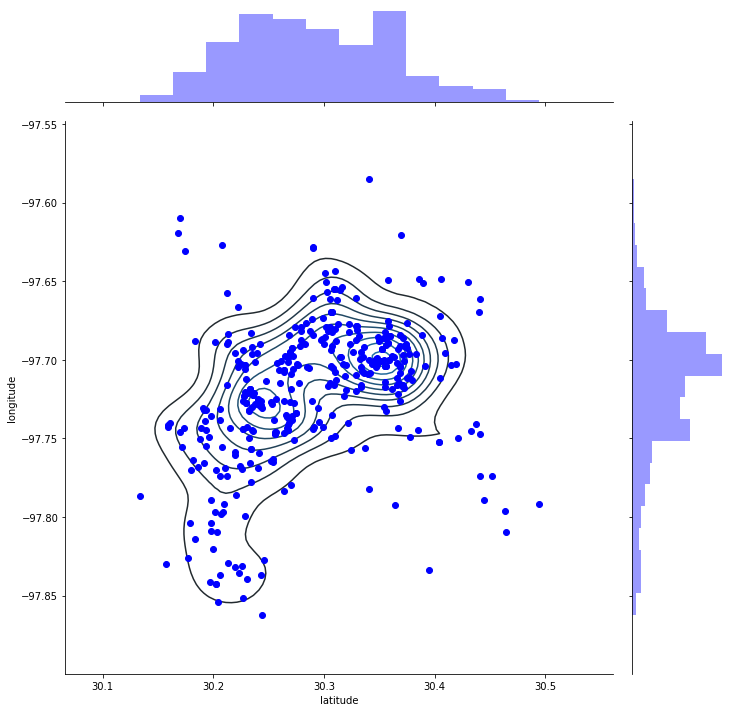

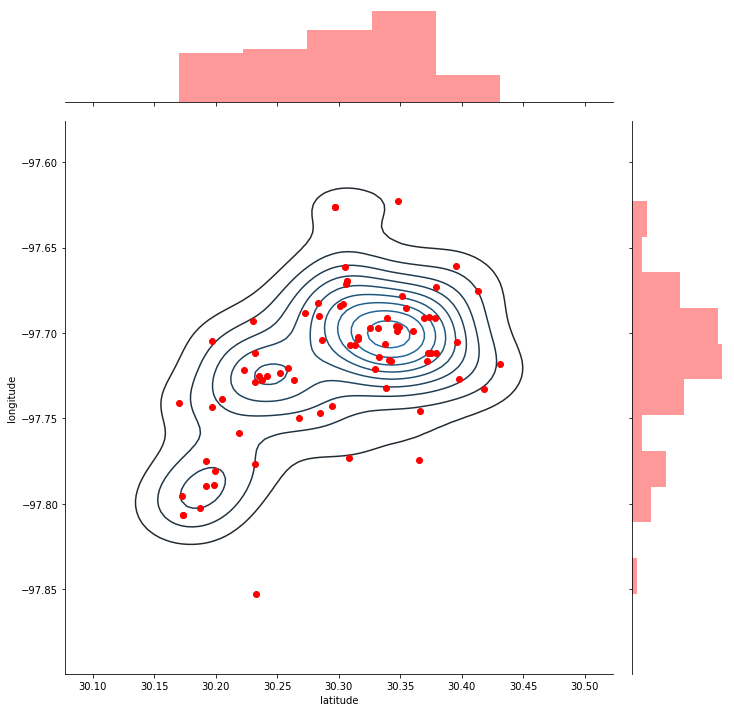

In [9]:
# Create a dataframe for murders, capital murders, and rapes
df_mur = df[df.highest_offense_description == 'MURDER']
df_mur_cap = df[df.highest_offense_description == 'CAPITAL MURDER']
df_rape = df[df.highest_offense_description == 'RAPE']

# What are the top zipcodes for murders? 
print('----------------------------------')
print('Murder')
print('----------------------------------')
df_mur_val = df_mur.zip_code.value_counts()
display(df_mur_val)
print('----------------------------------')
display(df_mur.zip_code.value_counts(normalize=True))

# What are the top zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murder')
print('----------------------------------')
df_mur_cap_val = df_mur_cap.zip_code.value_counts()
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap.zip_code.value_counts(normalize=True))

# What are the top 10 zipcodes for rape? 
print('----------------------------------')
print('Rape')
print('----------------------------------')
df_rape_val = df_rape.zip_code.value_counts().head(21)
display(df_rape_val)
print('----------------------------------')
display(df_rape.zip_code.value_counts(normalize=True).head(21))

df_mur_val.plot.bar(figsize=(20,10), rot=60, fontsize=12)
plt.title('Murder')
plt.show()
plt.savefig('murder.png')

df_mur_cap_val.plot.bar(figsize=(20,10), rot=60, fontsize=12)
plt.title('Capital Murder')
plt.show()
plt.savefig('capital_murder.png')

df_rape_val.plot.bar(figsize=(20,10), fontsize=12, rot=60)
plt.title('Rape')
plt.show()
plt.savefig('rape.png')

print('------------------------------------------------------------------------------------------')
print('Plotting Murder and Capital Murder in Seaborn Jointplots using Latitude and Longitude Data')
print('------------------------------------------------------------------------------------------')


# Plotting the two murder dataframes latitude and longitude. The rape dataframe cannot be plotted since it contains no coordinates.
sns.jointplot('latitude', 'longitude', data=df_mur, color='b', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10), 
sns.jointplot('latitude', 'longitude', data=df_mur_cap, color='r', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

So far, 78753 and 78741 are the top hotspots for all sorts of crime in Austin, including violent crime.

For murders, 78741 comes in at number 1 with 10.91%. 

#### ***It is important to note that murder does not necessarily make the defendant(s) automatically eligible for the death penalty. Under Texas law, we distinguish capital murder, through the motives and actions of the defendant(s) during the commission of a homicide, as automatically warranting an eventual date with the executioner. This includes such things as premeditation, murdering a police officer, etc.***


Regarding capital murder, 78723 comes in to share the number one spot with 78753, with a rate of 13.92% each. The 78741 area drops to the number 3 spot, carrying 8.97%. 

Next, 78741 climbs back to claim the number 1 spot for rape at 12.09% -- 3.43 percentage points higher than the number 2 spot 78753 carrying 8.66% which is quite a significant lead when you look at it on the graph!! Why does rape occur so much more often in this area than in others? 



In the next part of the analysis, we'll look even closer at all the above data... 